<center>
    <h1> Predicting Air Quality for Health Risk Assessment: A Machine Learning Approach </h1>
    <h2> Data Cleaning, Preprocessing, and Exploratory Data Analysis </h2>
    <h3> Divya Neelamegam, Padhma Cebolu Srinivasan, Poojitha Venkat Ram, Shruti Badrinarayanan, Sourabh Suresh Kumar </h3>
</center>

## Data Preprocessing

In [ ]:
import csv
import pandas as pd
import matplotlib
import matplotlib .pyplot as plt
import seaborn as sns

df = pd.read_csv("city_day.csv")
print("Before data preprocessing")
df.head()

Before data preprocessing


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the columns with missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
numerical_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# The 'errors' parameter is set to 'coerce' to handle any non-numeric values by converting them to NaN.

# Check the data types after conversion
print("Data Types after Conversion:")
print(df.dtypes)

Data Types after Conversion:
City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object


In [ ]:
#Replacing mean with missing values
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].mean()))
df['PM10']=df['PM10'].fillna((df['PM10'].mean()))
df['NO']=df['NO'].fillna((df['NO'].mean()))
df['NO2']=df['NO2'].fillna((df['NO2'].mean()))
df['NOx']=df['NOx'].fillna((df['NOx'].mean()))
df['NH3']=df['NH3'].fillna((df['NH3'].mean()))
df['CO']=df['CO'].fillna((df['CO'].mean()))
df['SO2']=df['SO2'].fillna((df['SO2'].mean()))
df['O3']=df['O3'].fillna((df['O3'].mean()))
df['Benzene']=df['Benzene'].fillna((df['Benzene'].mean()))
df['Toluene']=df['Toluene'].fillna((df['Toluene'].mean()))
df['Xylene']=df['Xylene'].fillna((df['Xylene'].mean()))
df['AQI']=df['AQI'].fillna((df['AQI'].mean()))

# Removing rows with NaN values in 'AQI_Bucket' column
df = df.dropna(subset=['AQI_Bucket'])

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [ ]:
df.to_csv('processed_data.csv', index=False)

**Data preprocessing**
1. Handling missing values by substituting them with the mean value of their
   corresponding feature.
2. Converting the date column into a datetime format.
3. Eliminating records that lack a target value (AQI_Bucket).

# EDA

/Users/shruti/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


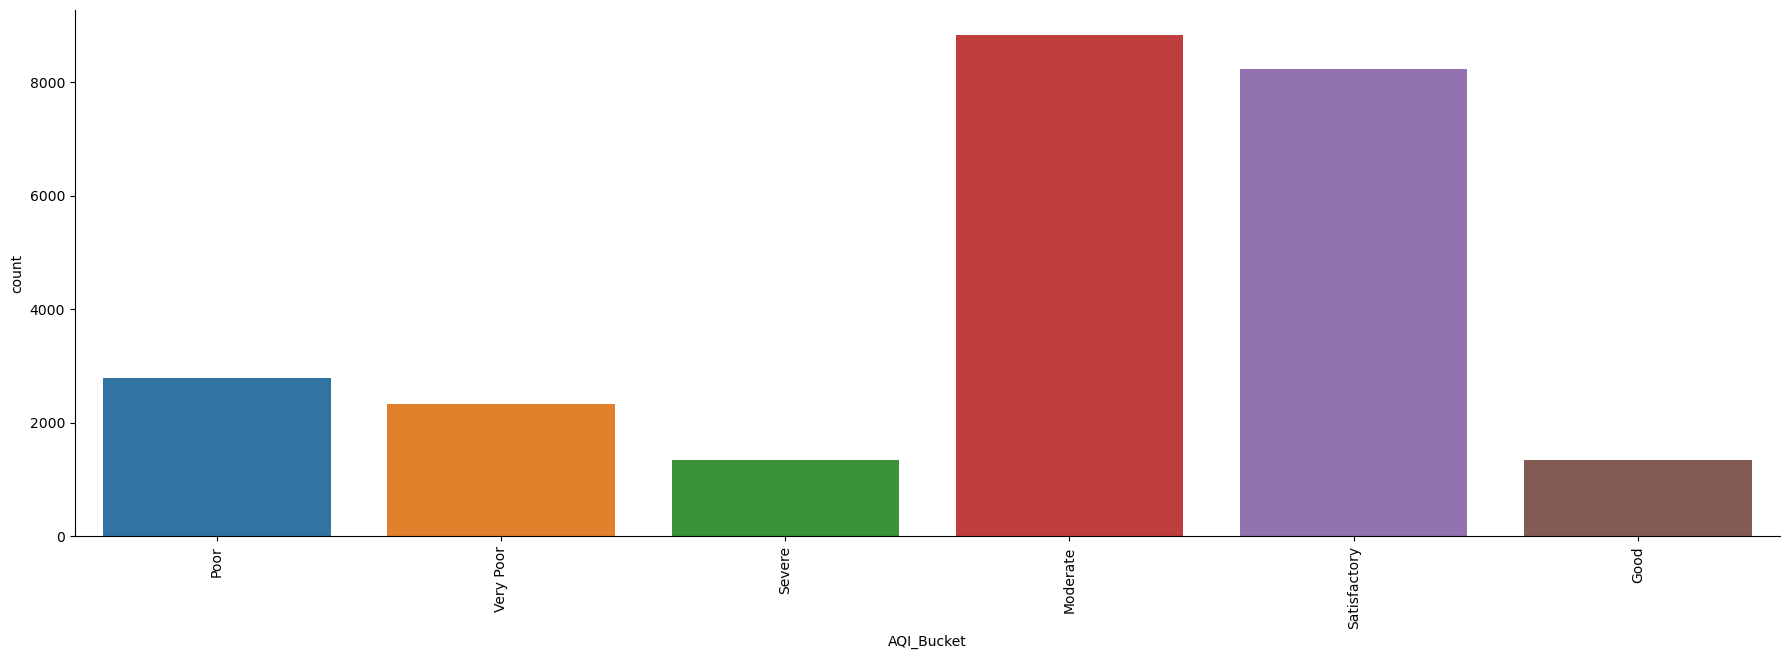

In [ ]:
plot1 = sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3)
plot1.set_xticklabels(rotation=90)

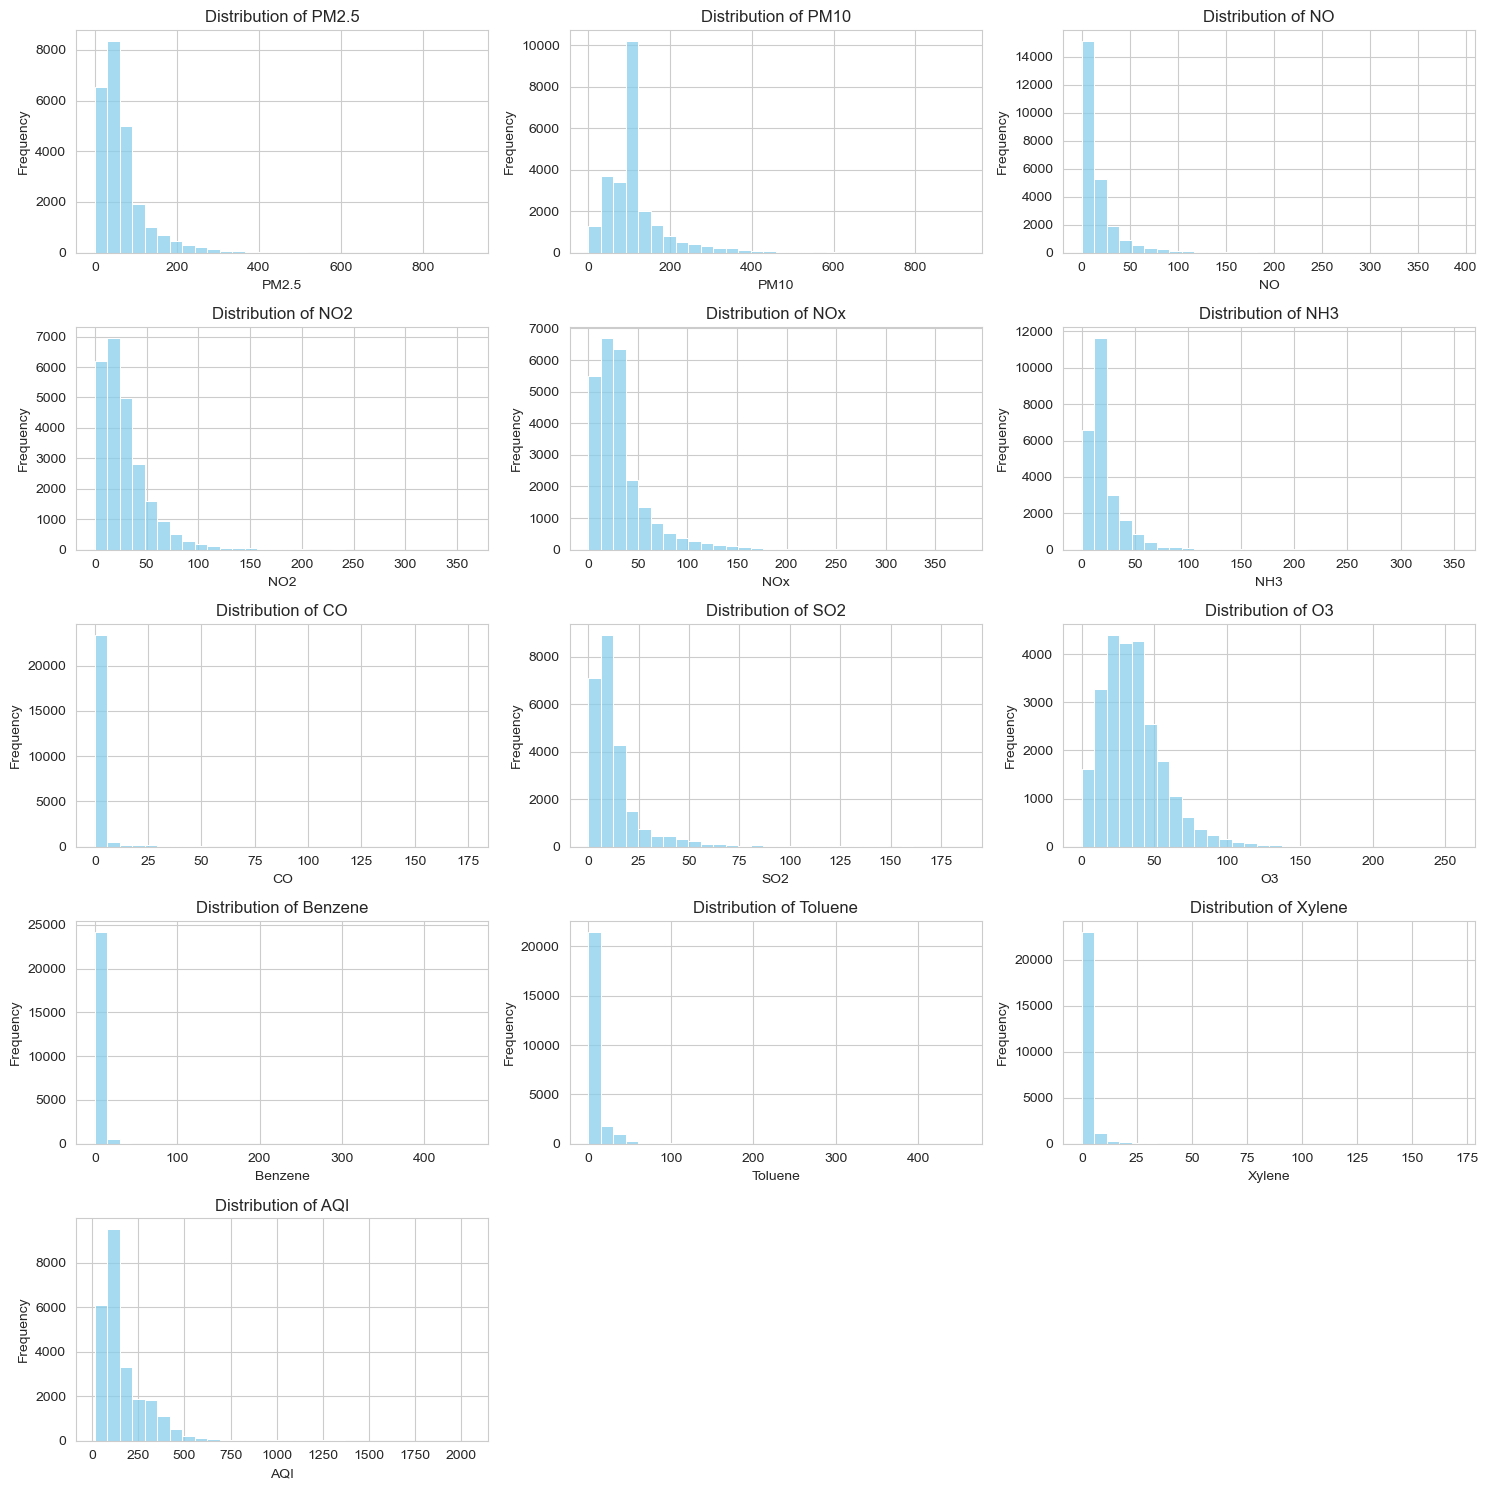

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


plt.figure(figsize=(15, 15))

# subplots for histograms
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], bins=30, kde=False, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

## Conclusion
### Skewness: Many of the pollutant concentrations (e.g., PM2.5, PM10, NO, NO2) are right-skewed, meaning that there are a few days with extremely high pollution levels.
### Distribution: The AQI (Air Quality Index) also shows a right-skewed distribution, with most of the days having a moderate AQI, but with some days experiencing very poor air quality.

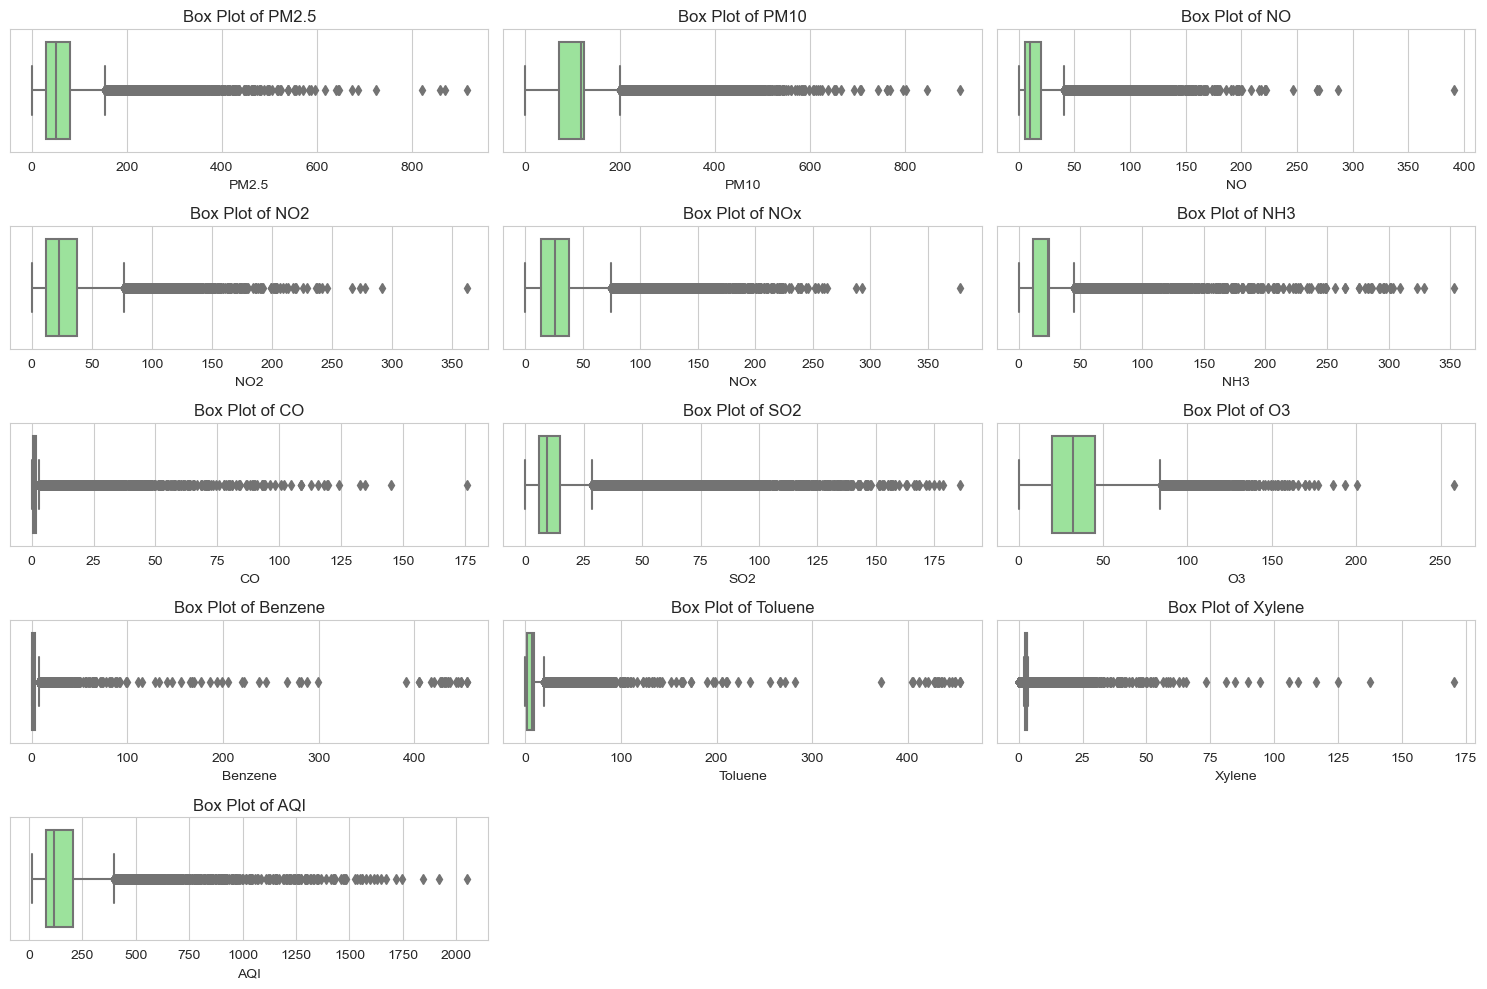

In [ ]:
# Initialize the figure
plt.figure(figsize=(15, 10))

# subplots for box plots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

### Box Plots
### Outliers: The box plots reveal a significant number of outliers in almost all the pollutant concentrations. This is consistent with the presence of extreme values that we observed in the summary statistics.
### Interquartile Range (IQR): The IQR (box size) is relatively small for many pollutants, indicating that the central 50% of the data is closely packed together

In [ ]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values:\n", missing_values)


Missing Values:
 Series([], dtype: int64)


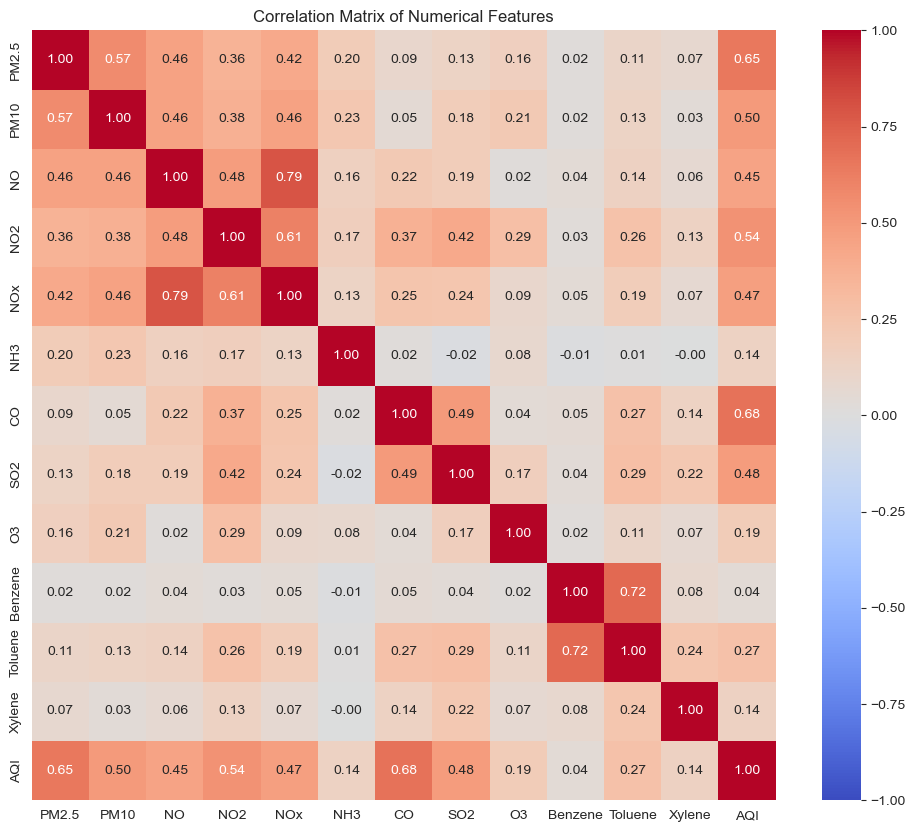

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


PM2.5 and PM10:  these have a strong positive correlation, indicating that when PM2.5 levels are high, PM10 levels tend to be high as well, and vice versa.
NO, NO2, and NOx: These nitrogen oxides also show strong positive correlations with each other.
CO and Benzene: These show a positive correlation, suggesting that when carbon monoxide levels are high, benzene levels tend to be high as well.

The heatmap provides a clear visual representation of how different air pollutants are related to each other.
Understanding these relationships is crucial for interpreting the data correctly and can be particularly useful when building predictive models.


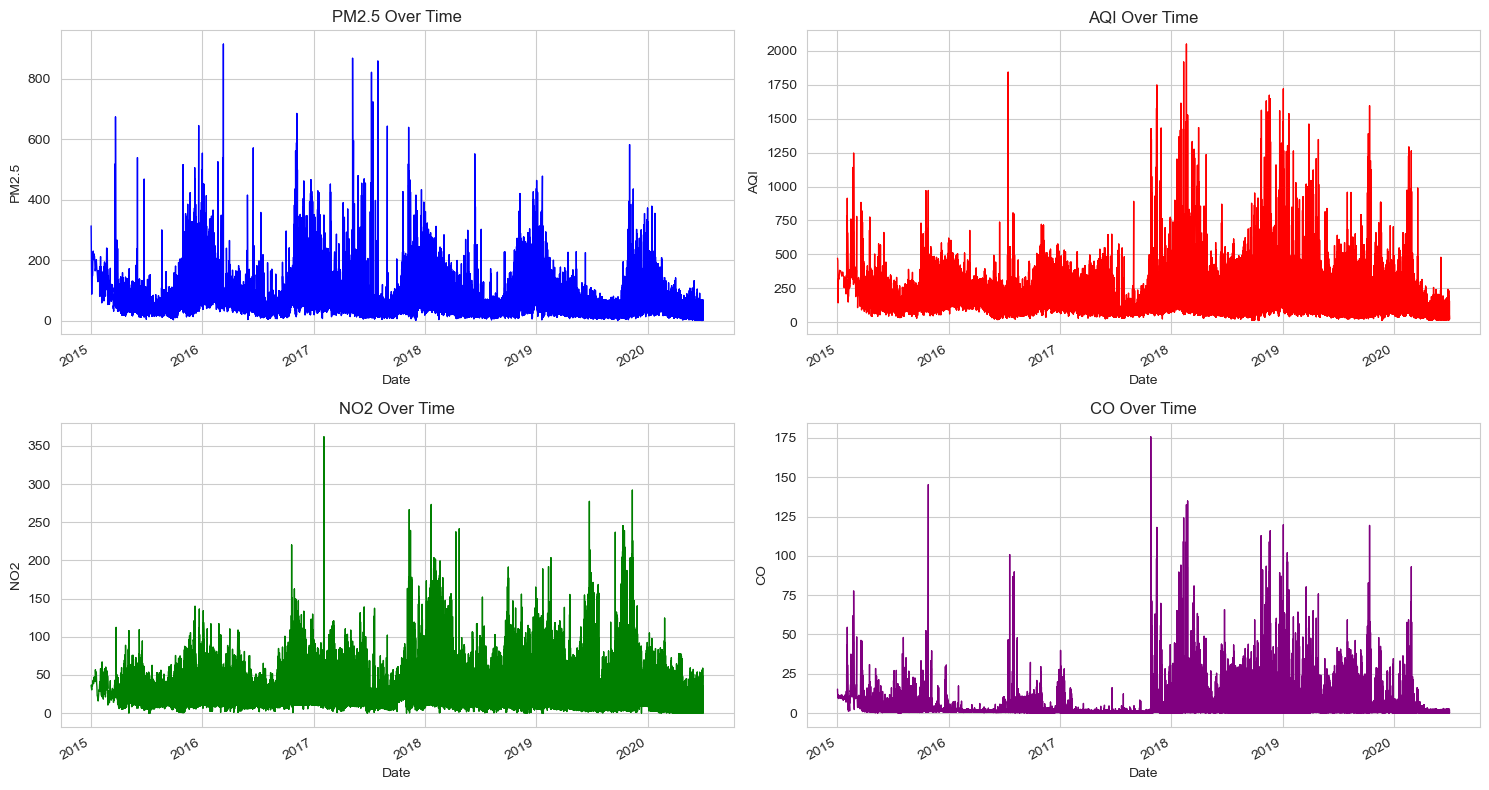

In [ ]:
plt.figure(figsize=(15, 8))

# Time series plot for PM2.5
plt.subplot(2, 2, 1)
df.set_index('Date')['PM2.5'].plot(color='blue', linewidth=1)
plt.title('PM2.5 Over Time')
plt.ylabel('PM2.5')

# Time series plot for AQI
plt.subplot(2, 2, 2)
df.set_index('Date')['AQI'].plot(color='red', linewidth=1)
plt.title('AQI Over Time')
plt.ylabel('AQI')

# Time series plot for NO2
plt.subplot(2, 2, 3)
df.set_index('Date')['NO2'].plot(color='green', linewidth=1)
plt.title('NO2 Over Time')
plt.ylabel('NO2')

# Time series plot for CO
plt.subplot(2, 2, 4)
df.set_index('Date')['CO'].plot(color='purple', linewidth=1)
plt.title('CO Over Time')
plt.ylabel('CO')

# Adjust layout
plt.tight_layout()
plt.show()

1. PM2.5 Over Time
Trend: There are periods with spikes in PM2.5 levels, indicating episodes of high air pollution.
Seasonality: There seems to be a recurring pattern, possibly indicating seasonal variations in PM2.5 levels.
2. AQI Over Time
Trend: Similar to PM2.5, the AQI shows spikes, reflecting periods of poor air quality.
Seasonality: There is a suggestion of seasonality, with certain times of the year experiencing worse air quality.
3. NO2 Over Time
Trend: NO2 levels also show spikes, though they appear less extreme than those for PM2.5.
Variability: There is considerable variability in NO2 levels over time.
4. CO Over Time
Trend: CO levels show fewer spikes compared to PM2.5 and NO2.
Stability: CO levels appear more stable over time, though there are still periods of elevated levels.

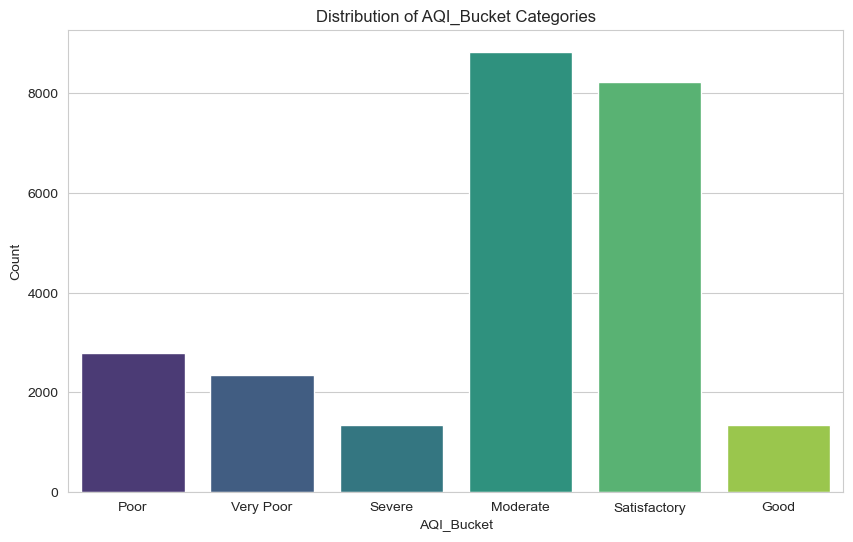

In [ ]:
# Count plot for AQI_Bucket
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AQI_Bucket', palette='viridis')
plt.title('Distribution of AQI_Bucket Categories')
plt.ylabel('Count')
plt.show()


Moderate: The most common AQI category is "Moderate," indicating that the air quality is acceptable for most days in the dataset.
Satisfactory: The second most common category is "Satisfactory," suggesting that the air quality is generally good.
Poor, Very Poor, and Severe: These categories, indicating worse air quality, occur less frequently but are still present, indicating episodes of significant air pollution.
Good: The "Good" category is the least common, suggesting that days with excellent air quality are rare.

In [ ]:
# Function to calculate IQR and identify outliers
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers


outliers_PM25 = detect_outliers(df, 'PM2.5')
print("Number of outliers in PM2.5:", len(outliers_PM25))


Number of outliers in PM2.5: 2011


In [ ]:
# PM related columns
pm_columns = ['PM2.5', 'PM10']

# Dictionary to store outliers for each PM column
pm_outliers = {}

# Detecting outliers for each PM column
for col in pm_columns:
    outliers = detect_outliers(df, col)
    pm_outliers[col] = {
        "Number of Outliers": len(outliers),
        "Outliers": outliers
    }
    print(f"Number of outliers in {col}: {len(outliers)}")


Number of outliers in PM2.5: 2011
Number of outliers in PM10: 2453


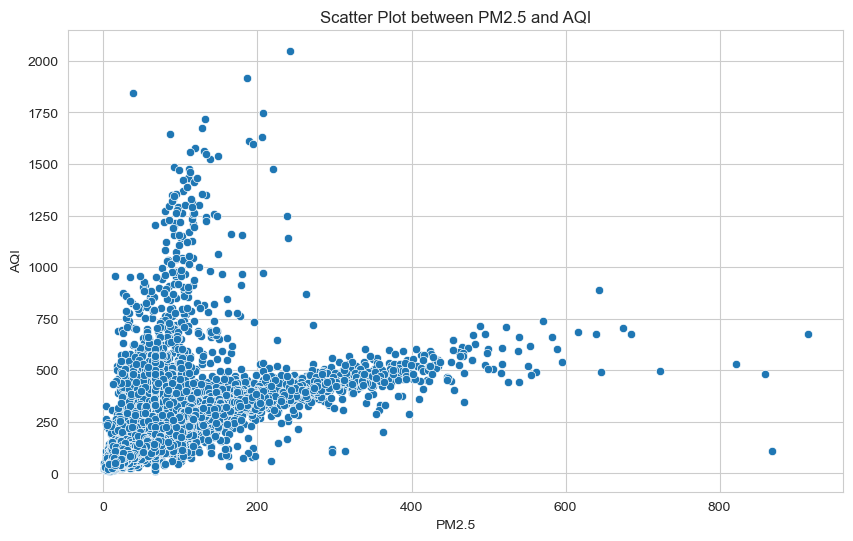

In [ ]:
# Scatter plot between PM2.5 and AQI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PM2.5', y='AQI')
plt.title('Scatter Plot between PM2.5 and AQI')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()


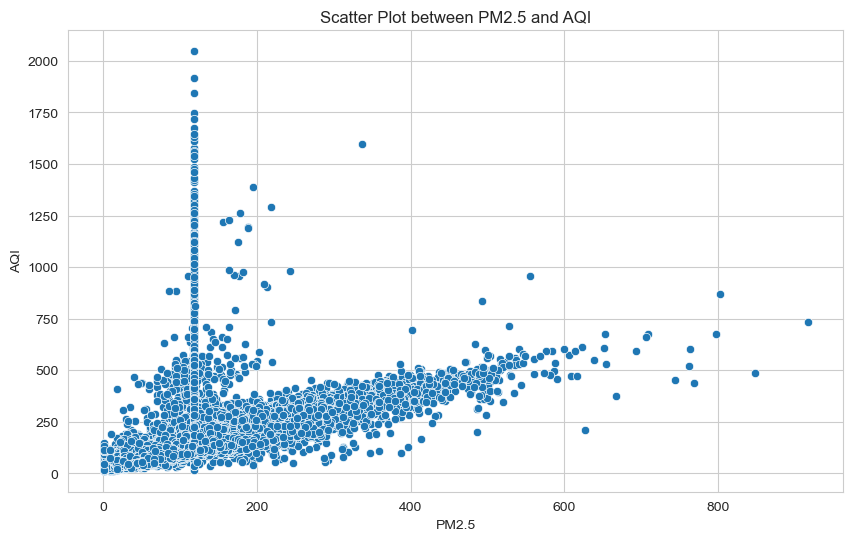

In [ ]:
# Scatter plot between PM2.5 and AQI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PM10', y='AQI')
plt.title('Scatter Plot between PM2.5 and AQI')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()
